<a href="https://colab.research.google.com/github/Farhan99-hub/Deep_Learning/blob/main/TB_Prediction/Tb_Prediction_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farhansanaansari","key":"b6d000edb732891a838b0043b11c7177"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ankushpanday1/heart-attack-in-youth-of-india                     Heart attack in youth of India                      298KB  2025-01-02 15:20:31            878         29  1.0              
oktayrdeki/heart-disease                                         Heart Disease                                       568KB  2024-12-29 13:26:49           1146         31  1.0              
stealthtechnologies/predict-student-performance-dataset          Predict Student Performance                          12KB  2024-12-26 12:57:04           1436         39  1.0              
bhadramohit/customer-shopping-latest-trends-dataset    

In [ ]:
!kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
100% 661M/663M [00:31<00:00, 24.9MB/s]
100% 663M/663M [00:31<00:00, 22.1MB/s]


In [ ]:
!unzip tuberculosis-tb-chest-xray-dataset

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os, shutil
import matplotlib.image as mpimg

In [ ]:
listN = os.listdir('/content/TB_Chest_Radiography_Database/Normal')
listTB = os.listdir('/content/TB_Chest_Radiography_Database/Tuberculosis')
img_num_n = len(listN)
img_num_tb = len(listTB)
print('Number of Normal Images: ', img_num_n)
print('Number of Tuberculosis Images: ', img_num_tb)

Number of Normal Images:  3500
Number of Tuberculosis Images:  700


Since there is a huge differene between Normal and tb images, we will augment TB images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

source_dir = '/content/TB_Chest_Radiography_Database/Tuberculosis'
destination_dir = '/content/TB_Chest_Radiography_Database/Tuberculosis'

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

for image in os.listdir(source_dir):
  if image.endswith(('.png', '.jpg', '.jpeg')):
    img_path = os.path.join(source_dir, image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    x=img.reshape((1,) + img.shape)

    i=0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=destination_dir, save_prefix='aug', save_format='jpeg'):
      i += 1
      if i >= 5:
        break



In [ ]:
listN = os.listdir('/content/TB_Chest_Radiography_Database/Normal')
listTB = os.listdir('/content/TB_Chest_Radiography_Database/Tuberculosis')
img_num_n = len(listN)
img_num_tb = len(listTB)
print('Number of Normal Images: ', img_num_n)
print('Number of Tuberculosis Images: ', img_num_tb)

Number of Normal Images:  3500
Number of Tuberculosis Images:  3625


In [ ]:
tb_dir = '/content/TB_Chest_Radiography_Database/Tuberculosis'
normal_dir = '/content/TB_Chest_Radiography_Database/Normal'

In [ ]:
#renaming the files
i = 1
for filename in os.listdir(normal_dir):
  src = os.path.join(normal_dir,filename)
  dst= os.path.join(normal_dir,"normal_"+str(i)+".jpg")
  os.rename(src,dst)
  i+=1
print("Normal images renamed")

Normal images renamed


In [ ]:
#renaming the files
i = 1
for filename in os.listdir(tb_dir):
  src = os.path.join(tb_dir,filename)
  dst= os.path.join(tb_dir,"tb_"+str(i)+".jpg")
  os.rename(src,dst)
  i+=1
print("TB images renamed")

TB images renamed


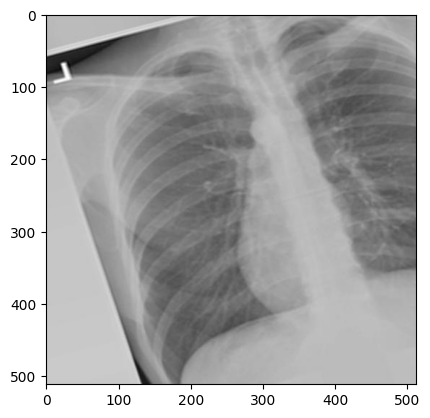

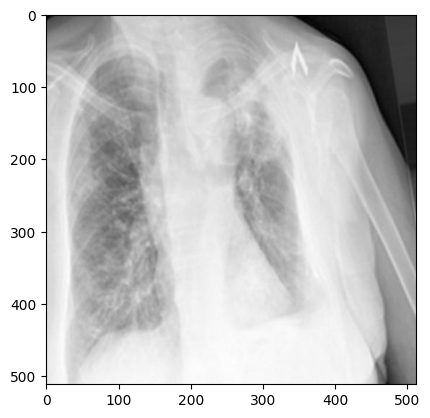

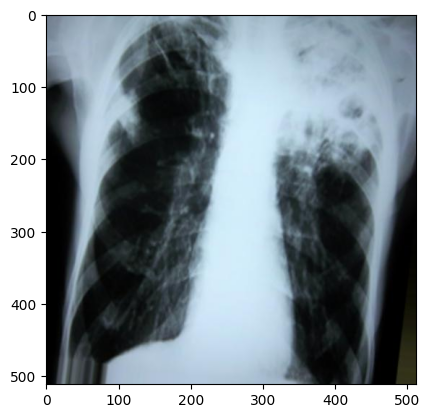

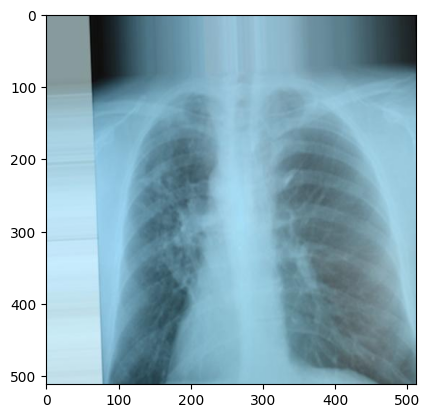

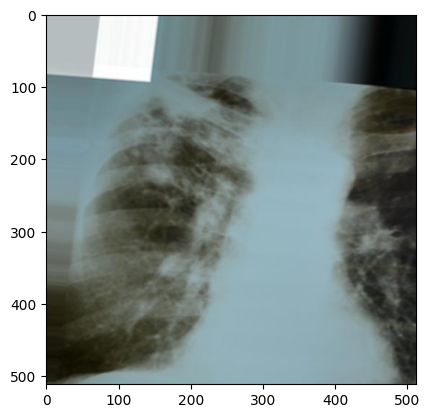

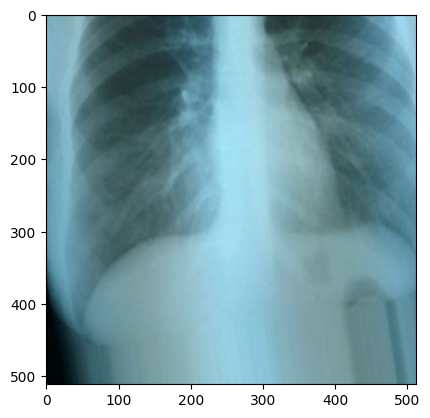

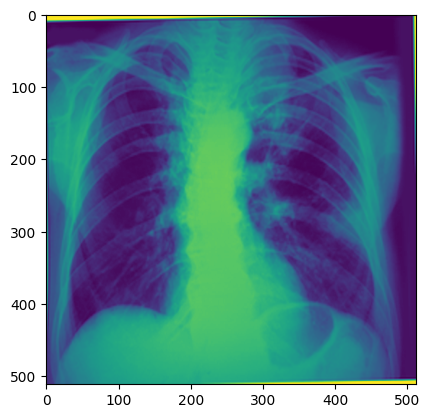

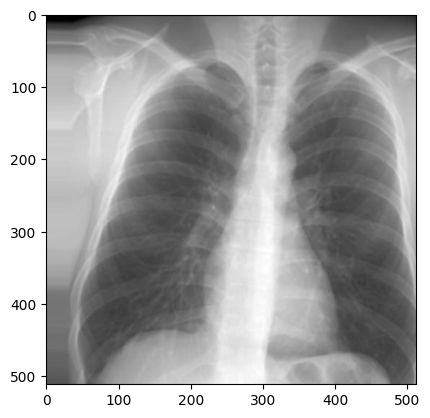

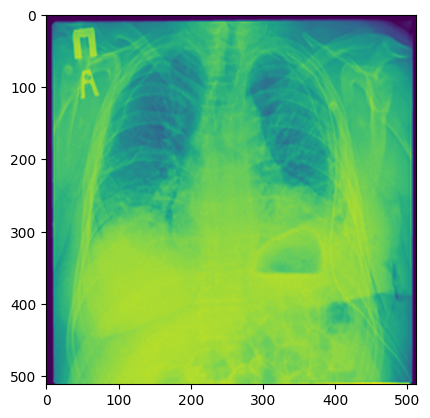

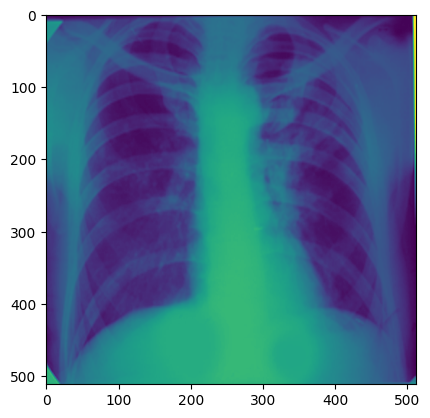

In [ ]:
#pic viewing

for i in os.listdir(tb_dir)[:10]:
  path = os.path.join(tb_dir,i)
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

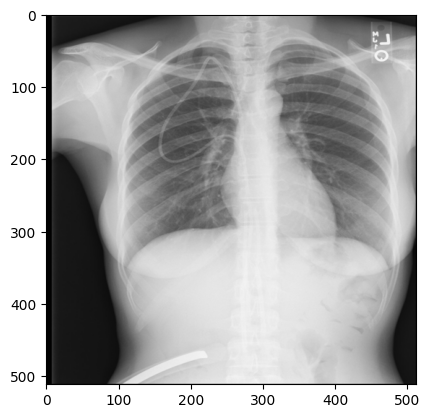

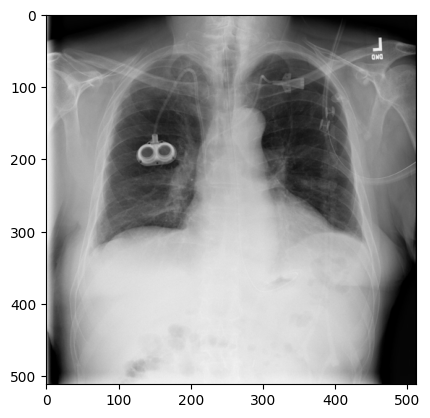

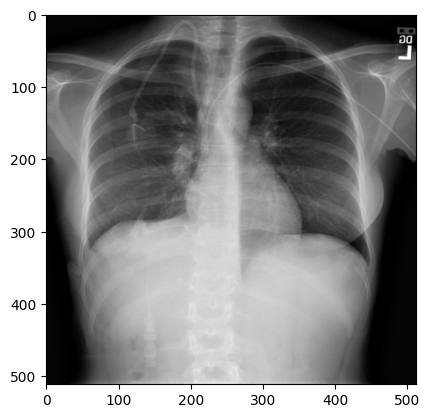

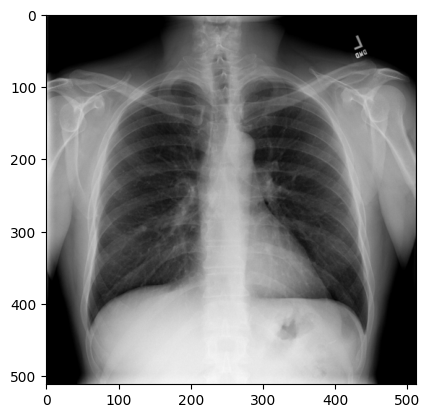

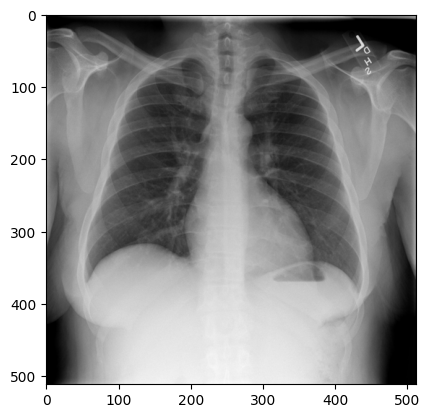

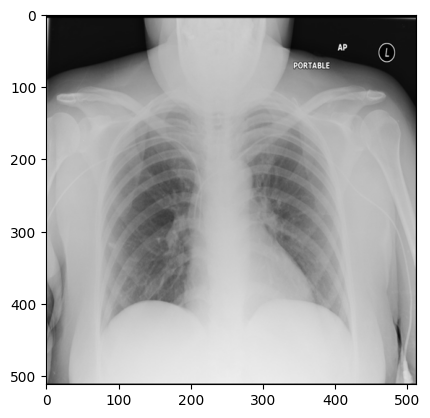

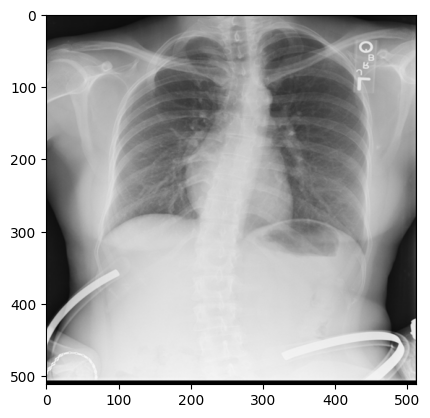

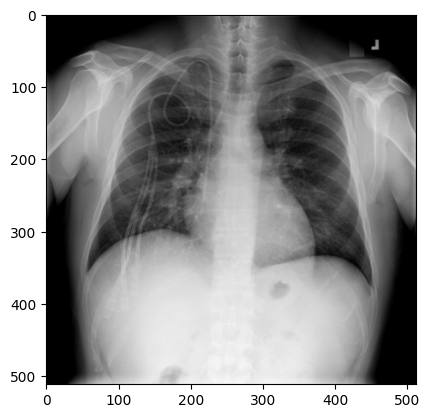

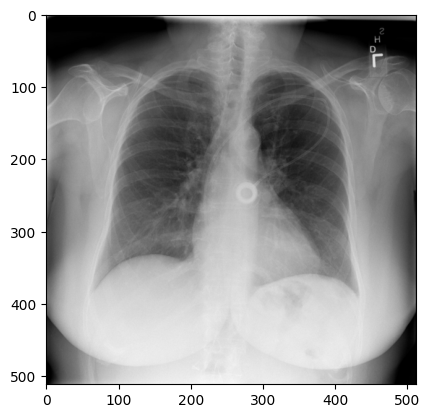

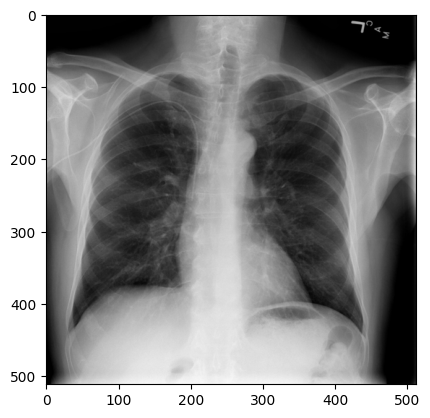

In [ ]:
for i in os.listdir(normal_dir)[:10]:
  path = os.path.join(normal_dir,i)
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

Cropping images

In [ ]:
source_dir = '/content/TB_Chest_Radiography_Database/Tuberculosis'
destination_dir = '/content/TB_Chest_Radiography_Database/Tuberculosis'

for filename in os.listdir(tb_dir):
  img = cv2.imread(os.path.join(tb_dir,filename))
  cropped_img = img[100:500, 10:500]
  # The change is here. Output path now includes the filename
  # ensuring cv2.imwrite knows the format to save in.
  output_path = os.path.join(destination_dir, filename)
  cv2.imwrite(output_path,cropped_img)

In [ ]:
source_dir = '/content/TB_Chest_Radiography_Database/Normal'
destination_dir = '/content/TB_Chest_Radiography_Database/Normal'

for filename in os.listdir(normal_dir):
  img = cv2.imread(os.path.join(normal_dir,filename))
  cropped_img = img[100:500, 10:500]
  # The change is here. Output path now includes the filename
  # ensuring cv2.imwrite knows the format to save in.
  output_path = os.path.join(destination_dir, filename)
  cv2.imwrite(output_path,cropped_img)

Splitting the data in train test and validation


In [ ]:
# Define the source directories for normal and tuberculosis images
import random
normal_dir = '/content/TB_Chest_Radiography_Database/Normal'
tb_dir = '/content/TB_Chest_Radiography_Database/Tuberculosis'

# Define the destination directories for train, test, and validation sets
train_dir = '/content/TB_Chest_Radiography_Database/train'
test_dir = '/content/TB_Chest_Radiography_Database/test'
val_dir = '/content/TB_Chest_Radiography_Database/val'


# Create the destination directories if they don't exist
os.makedirs(os.path.join(train_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'tb'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'tb'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'tb'), exist_ok=True)


def split_data(source_dir, train_dir, test_dir, val_dir, split_ratio=(0.7,0.2,0.1)):
    images = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    random.shuffle(images)

    train_split = int(len(images) * split_ratio[0])
    test_split = int(len(images) * (split_ratio[0] + split_ratio[1]))

    train_images = images[:train_split]
    test_images = images[train_split:test_split]
    val_images = images[test_split:]

    for image in train_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(train_dir, image)
        shutil.copy(source_path, destination_path)

    for image in test_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(test_dir, image)
        shutil.copy(source_path, destination_path)

    for image in val_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(val_dir, image)
        shutil.copy(source_path, destination_path)


# Split normal images
split_data(normal_dir, os.path.join(train_dir, 'normal'), os.path.join(test_dir, 'normal'), os.path.join(val_dir, 'normal'))

# Split tuberculosis images
split_data(tb_dir, os.path.join(train_dir, 'tb'), os.path.join(test_dir, 'tb'), os.path.join(val_dir, 'tb'))

Model building

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/TB_Chest_Radiography_Database/train', batch_size=32, target_size=(224,224), class_mode='categorical', shuffle=True, seed = 42, color_mode='rgb' )
test_generator = test_datagen.flow_from_directory('/content/TB_Chest_Radiography_Database/test', batch_size=32, target_size=(224,224), class_mode='categorical', shuffle=True, seed = 42, color_mode='rgb')
val_generator = val_datagen.flow_from_directory('/content/TB_Chest_Radiography_Database/val', batch_size=32, target_size=(224,224), class_mode='categorical', shuffle=True, seed = 42, color_mode='rgb')

Found 4987 images belonging to 2 classes.
Found 1424 images belonging to 2 classes.
Found 714 images belonging to 2 classes.


In [ ]:
class_label = train_generator.class_indices
class_name = list(class_label.keys())
print(class_label)

{'normal': 0, 'tb': 1}


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

# Fourth Convolutional Block
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(2, activation='softmax'))  # For binary classification with softmax

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the train and validation datasets
train_generator = train_datagen.flow_from_directory(
    '/content/TB_Chest_Radiography_Database/train', # Updated path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Replace 'path_to_validation_data' with the actual path to your validation data
validation_generator = val_datagen.flow_from_directory(
    '/content/TB_Chest_Radiography_Database/val', # Updated path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Class weights to balance the dataset
class_weights = {0: 1.0, 1: 1.0}  # Adjust weights based on data distribution if needed


# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 4987 images belonging to 2 classes.
Found 714 images belonging to 2 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 222, 222, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 109, 109, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │              

 Total params: 356,482 (1.36 MB)

 Trainable params: 355,714 (1.36 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 84s 467ms/step - accuracy: 0.5403 - loss: 0.7260 - val_accuracy: 0.4916 - val_loss: 0.6987
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 431ms/step - accuracy: 0.7090 - loss: 0.5743 - val_accuracy: 0.5784 - val_loss: 0.6823
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 70s 424ms/step - accuracy: 0.7723 - loss: 0.5047 - val_accuracy: 0.6695 - val_loss: 0.6088
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 81s 427ms/step - accuracy: 0.8023 - loss: 0.4603 - val_accuracy: 0.8669 - val_loss: 0.4193
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.8367 - loss: 0.4171 - val_accuracy: 0.8894 - val_loss: 0.3052
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 70s 432ms/step - accuracy: 0.8389 - loss: 0.3848 - val_accuracy: 0.8908 - val_loss: 0.2771
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 433ms/step - accuracy: 0.8567 - loss: 0.3509 - val_accuracy: 0.8992 - val_loss: 0.2535
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 70s 433ms/step - accuracy: 0.8765 - loss: 0.3080 - val

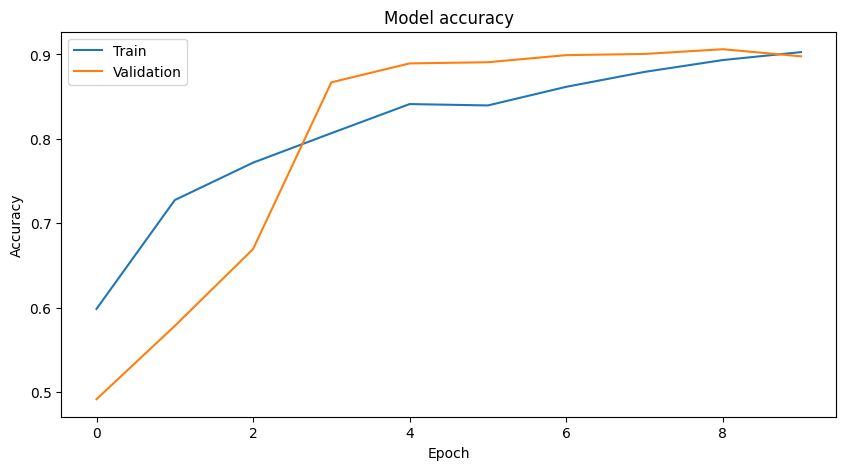

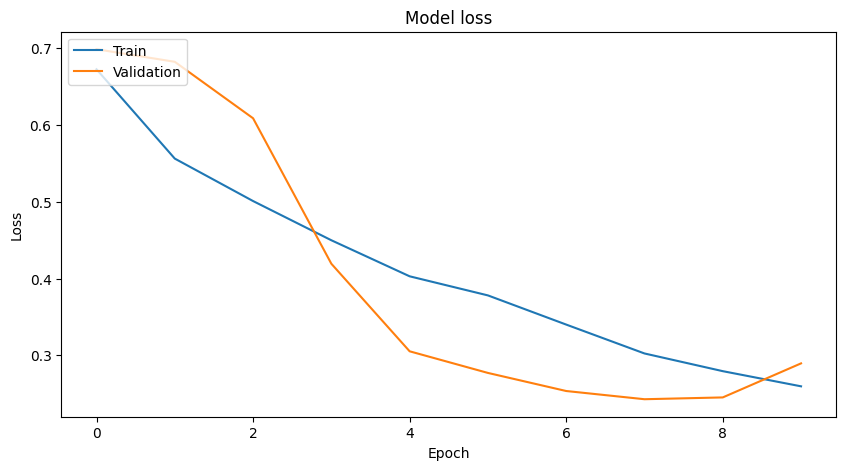

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()